# Customer Churn Prediction for SyriaTel Telecom

- Student name: Tracy Gwehona
- Student pace: Full Time
- Instructor name: Maryann Mwikali

## Business Understanding
### Overview
Customer churn (or the loss of customers) is one of the biggest challenges for telecommunications companies such as SyriaTel because acquiring new customers can be much more expensive than keeping them. High churn rates affect profitability, market share, and long-term expansion. I aim to use  historical customer information to anticipate who is destined to exit. If the company knows the churn pattern, it will be able to apply proactive measures to increase retention and customer satisfaction and keep up with the competition.

### Business problem
SyriaTel is having customer churn and that is directly impacting revenue and profit. For that, the company must know what causes the customer to be dissatisfied with it. SyriaTel can’t develop retention plans without understanding churn and high-risk customers, , leading to continued customer loss and a decline in market share.

To address this, I aim to:
1. Identify key factors influencing customer churn.
2. Predict customer churn.
3. Provide actionable insights to enable SyriaTel to implement targeted interventions.

## Data Understanding
The dataset being used for this project was obtained from [kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset?resource=download). Here, I am going to review the dataset to assess the structure and characteristics of the data.

In [15]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
# Loading the data

df = pd.read_csv('SyriaTelCustomerChurn.csv')

#### 1) .head()
Displays the first five rows of the data.

In [17]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### 2) .shape
Here, we are able to get the number of rows and columns of the whole data.

In [18]:
df.shape

(3333, 21)

- The data has 3,333 rows and 21 columns.

#### 3) .info()
Gets general information on tha data and each column.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

- 4 columns are of object datatype.
- 8 columns are of datatype integer.
- There are 8 columns with float datatype.
- There is 1 column, 'churn' column, with a boolean datatype.

#### 4) .describe()
Here, we get the summary statistics of the columns that contain numerical data.

In [20]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


- As shown in the output above, here we get the count of non-null values, mean, standard deviation, lower and upper quartile, minimum and maximum values of each column in the data.

## Data Preparation
### Data Cleaning
Data cleaning will involve dropping irrelevant columns, checking for duplicates and missing values and if duplicates or missing values are pesent in the data, action will be taken.

In [21]:
# Drop irrelevant columns

df.drop(columns=['state', 'area code', 'phone number'], axis=1, inplace=True)

In [22]:
# Check for duplicates

df.duplicated().sum()

0

There are no duplicated rows in the data.

In [23]:
# Check for missing values

df.isna().sum()

account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in the data.

## Data Analysis
### Univariate Analysis
We'll explore key variables such as churn, etc to understand their distributions and identify any patterns.

#### 1. Distribution of categorical data

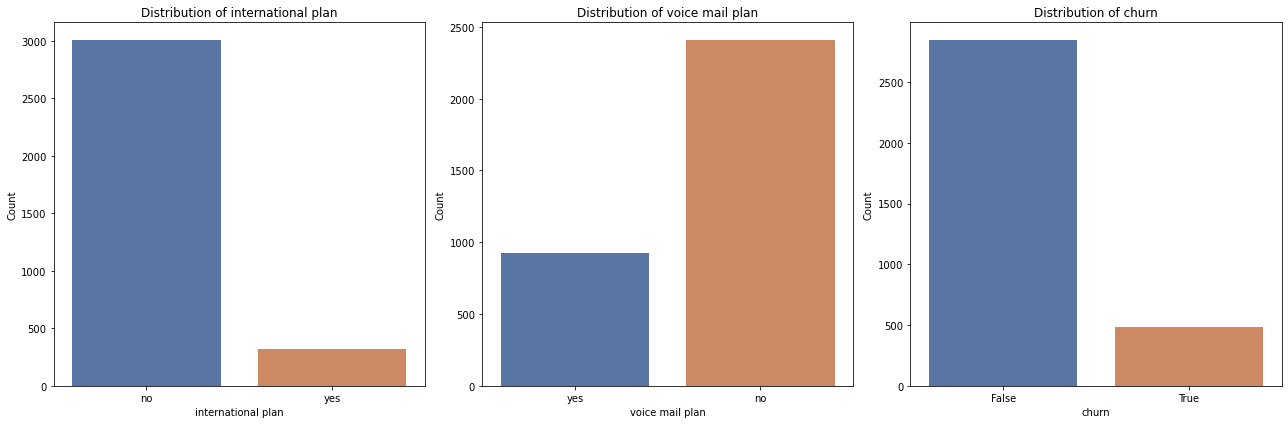

In [24]:
# List of columns with categorical data
columns = ['international plan', 'voice mail plan', 'churn']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through the columns and create count plots
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, palette='deep', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

- Majority of the customers have no international plan and voicemail plan.
- The number of customers who churn (stop using SyriaTel) are less.

#### 2. Distribution of numerical data

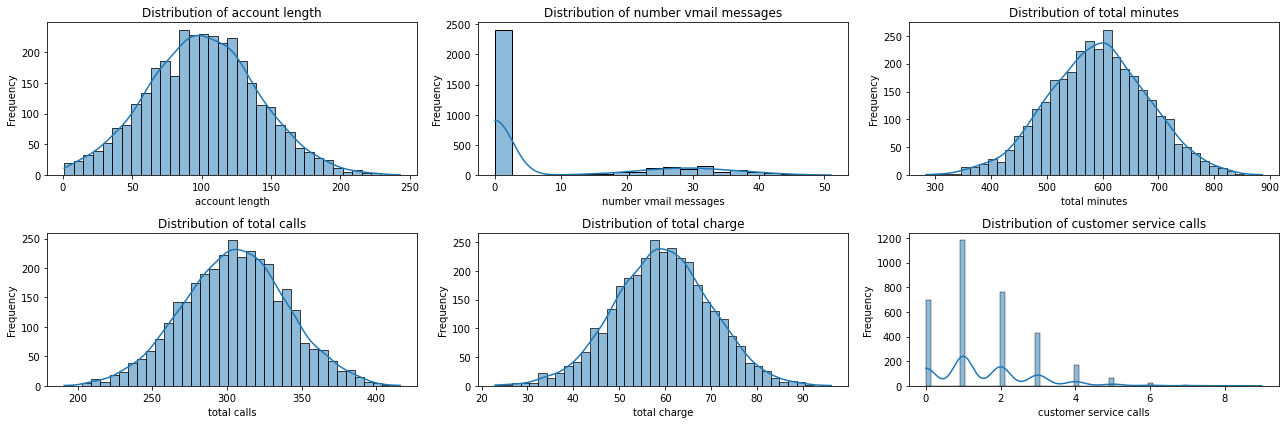

In [25]:
# Create new columns for total charge, minutes and calls
df1 = df.copy()

df1['total minutes'] = df1['total day minutes'] + df1['total eve minutes'] + df1['total night minutes'] + df1['total intl minutes']
df1['total calls'] = df1['total day calls'] + df1['total eve calls'] + df1['total night calls'] + df1['total intl calls']
df1['total charge'] = df1['total day charge'] + df1['total eve charge'] + df1['total night charge'] + df1['total intl charge']

# List of columns with numerical data
columns = ['account length', 'number vmail messages', 'total minutes', 'total calls', 'total charge', 'customer service calls']

fig, axes = plt.subplots(2, 3, figsize=(18, 6))

# Flatten axes array 
axes = axes.flatten()

# Loop through the columns and create histogram plots
for i, col in enumerate(columns):
    sns.histplot(data=df1, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')  

plt.tight_layout()
plt.show()

- **Distribution of account length** appears approximately normal, suggesting that the data is symmetrically distributed around the mean. Majority of the customers have an average account life span.
- **Distribution of number voicemail messages** is highly right-skewed with a large number of customers having 0 voicemail messages. Most customers don't use the voicemail service. A few have a higher number of messages, but they are rare.
- **Distribution of total minutes** appear to follow a roughly normal distribution, centered around the mean. Majority of customers use a moderate number of total minutes, with fewer using extremely low or high total minutes.
- **Distribution of total calls** is also normal, suggesting a balanced call usage pattern. Most customers make an average number of calls, with fewer customers making an extremely low or high number of calls.
- **Distribution of total charge** mirrors the distribution of total minutes, as charges are directly proportional to the minutes used. The spread indicates that customers have varied levels of charges, but most fall within the central range.
- **Distribution of customer service calls** is right-skewed, with most customers making 0 to 1 customer service calls. There are a few spikes at higher values. Most customers rarely contact customer service. However, customers who call frequently (especially with 4 or more calls) might indicate dissatisfaction, which could correlate with churn.

### Multivariate Analysis
Here, we’ll examine the relationships between the target variable (churn) and other features and also multiple features against other multiple features.

#### 3. Distribution of international and voicemail plans by churn

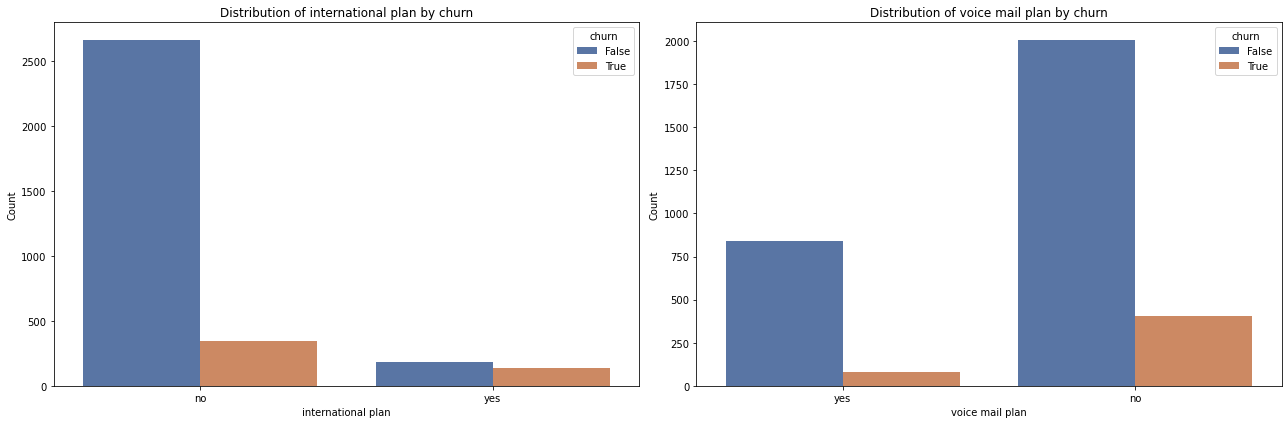

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Loop to create count plots
for i, col in enumerate(['international plan', 'voice mail plan']):
    sns.countplot(data=df, x=col, hue='churn', palette='deep', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


1. **International plan by churn**
- Majority of customers do not have an international plan, and among these, churn is relatively low. 
- A higher proportion of customers with an international plan have churned. This suggests that having an international plan may be associated with an increased likelihood of churn.
2. **Voice mail plan by churn**
- The majority of customers do not have a voice mail plan, and most of them did not churn. However, the number of customers who churned is significant among those without the plan.
- Fewer customers have a voice mail plan, and among them, the churn rate is relatively low compared to those without the plan. This indicates that customers with a voice mail plan are less likely to churn.

#### 4. Relationship between churn and columns with numerical data

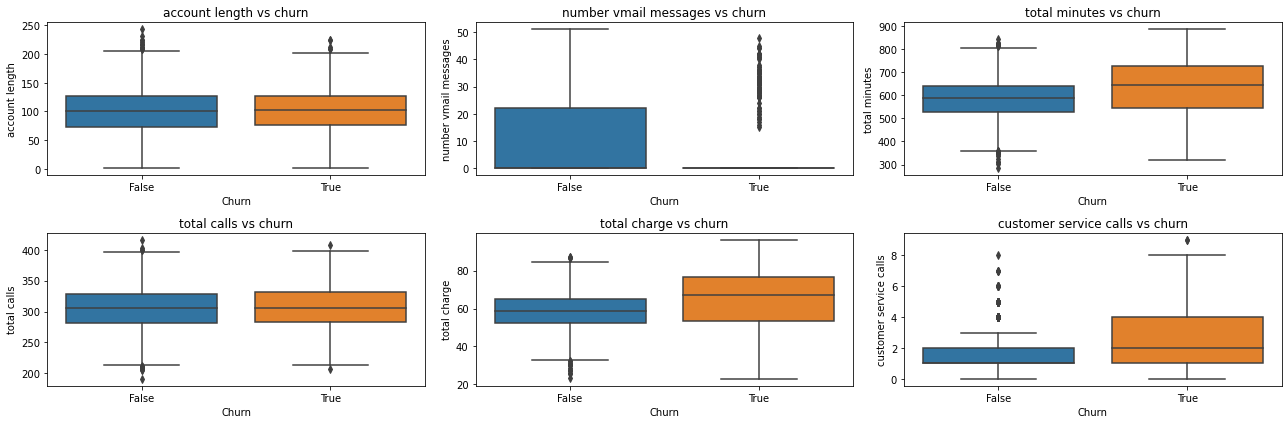

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 6))

# Flatten axes array 
axes = axes.flatten()

# Loop through the columns and create box plots
for i, col in enumerate(columns):
    sns.boxplot(data=df1, x='churn', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(f'{col}') 

plt.tight_layout()
plt.show()

1. **Account length vs churn**
- Both churned and non-churned customers show similar distributions for account length, with no major differences.
- Account length might not be a significant factor in predicting churn.
2. **Number of Voicemail Messages vs churn**
- The majority of customers have a low number of voicemail messages.
- There are many outliers at the upper end, suggesting some customers have significantly higher voicemail messages than the rest.
3. **Total Minutes vs churn**
- Non-churn customers: Total minutes appear to be centered around a slightly lower range.
- Churned customers: These customers have a wider range of total minutes, with a higher median.
- Customers with higher total usage might be more likely to churn, potentially due to high costs.
4. **Total Calls vs churn**
- Both churned and non-churned customers show similar distributions for total calls, with no major differences.
- Total calls might not be a significant factor in predicting churn.
5. **Total Charge vs churn**
- Non-churn customers: Charges are lower and have a narrower spread.
- Churned customers: Charges are higher and exhibit a wider spread.
- Higher total charges are associated with churn, suggesting dissatisfaction with billing or costs.
6. **Customer Service Calls vs churn**
- Non-churn customers: Fewer customer service calls, with most data concentrated at the lower range.
- Churned customers: More customer service calls, with some extreme outliers.
- High interaction with customer service is associated with churn, possibly indicating unresolved issues or dissatisfaction.


#### 5. Correlation Analysis

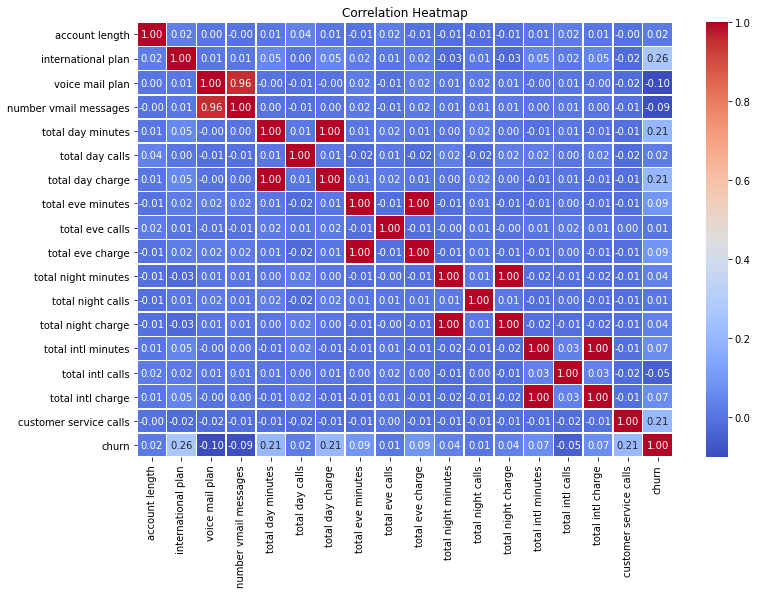

In [ ]:
# Convert categorical variables to numeric for easier plotting
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

# Plot heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

plt.show()


- Strongly correlated variables (e.g., total day minutes and total day charge) might provide redundant information.
- Variables showing significant differences in correlations (positive or negative) with the target (churn) might be more predictive.
- Features with minimal correlation (close to 0) might have limited relevance to predictive modeling unless their relationship with the target (churn) is non-linear.